In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("House_Price.csv")
df.head()

,Flat_Price,EMI_Starts,BHK,css-11nfaq3,Unnamed: 4,HOUSE_TYPE,Unnamed: 6,Unnamed: 7,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,6.0,BHK,Independent House,Independent,House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,5.0,BHK,Independent House,Independent,House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,4.0,BHK,Independent House,Independent,House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


# Preprocessing the Dataset

In [3]:
df.columns

Index(['Flat_Price', 'EMI_Starts', 'BHK', 'css-11nfaq3', 'Unnamed: 4',
       'HOUSE_TYPE', 'Unnamed: 6', 'Unnamed: 7', 'Purpose', 'Location',
       'Area_Type', 'Total_Sq.ft', 'Price_per_sq.ft', 'Owner_name',
       'Owner_type'],
      dtype='object')

In [4]:
df['bhk'] = df['css-11nfaq3']
df=df.drop(['BHK','css-11nfaq3','Unnamed: 6','Unnamed: 7','Owner_name','Owner_type'],axis=1)
df.shape

(3968, 10)

In [5]:
df.head()

,Flat_Price,EMI_Starts,Unnamed: 4,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,6.0
1,₹45.0 L,₹23.83 K,BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,3.0
2,₹1.35 Cr,₹67.02 K,BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,3.0
3,₹60.0 L,₹31.77 K,BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,5.0
4,₹52.0 L,₹27.54 K,BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,4.0


In [6]:
df.isna().sum()

Flat_Price         0
EMI_Starts         0
Unnamed: 4         2
HOUSE_TYPE         0
Purpose            2
Location           2
Area_Type          0
Total_Sq.ft        0
Price_per_sq.ft    0
bhk                2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().any()

Flat_Price         False
EMI_Starts         False
Unnamed: 4         False
HOUSE_TYPE         False
Purpose            False
Location           False
Area_Type          False
Total_Sq.ft        False
Price_per_sq.ft    False
bhk                False
dtype: bool

In [9]:
df['Type'] =df['Unnamed: 4']
df.head()

,Flat_Price,EMI_Starts,Unnamed: 4,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,6.0,BHK
1,₹45.0 L,₹23.83 K,BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,3.0,BHK
2,₹1.35 Cr,₹67.02 K,BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,3.0,BHK
3,₹60.0 L,₹31.77 K,BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,5.0,BHK
4,₹52.0 L,₹27.54 K,BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,4.0,BHK


In [10]:
df=df.drop(['Unnamed: 4'],axis=1)

In [11]:
df['Area_Type'].value_counts()

Area_Type
Build Up Area    3966
Name: count, dtype: int64

In [12]:
df['Type'].value_counts()

Type
BHK    3918
RK       46
BH        2
Name: count, dtype: int64

In [13]:
df['Purpose'].value_counts()

Purpose
for sale in    3966
Name: count, dtype: int64

In [14]:
df=df.drop(['Purpose','Area_Type'],axis=1)
df.head()

,Flat_Price,EMI_Starts,HOUSE_TYPE,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,Independent House,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft,6.0,BHK
1,₹45.0 L,₹23.83 K,Independent House,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft,3.0,BHK
2,₹1.35 Cr,₹67.02 K,Independent House,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft,3.0,BHK
3,₹60.0 L,₹31.77 K,Independent House,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft,5.0,BHK
4,₹52.0 L,₹27.54 K,Independent House,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft,4.0,BHK


In [15]:
df['HOUSE_TYPE'].value_counts()

HOUSE_TYPE
Independent House    3966
Name: count, dtype: int64

In [16]:
df=df.drop(['HOUSE_TYPE'],axis=1)

In [17]:
df1=df.copy()

# Feature Engineering

In [18]:
type_mapping = {
    'BHK': 2,
    'RK': 1,
    'BH': 0
}
df1['Type'] = df1['Type'].map(type_mapping)
df1.head()

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft,6.0,2
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft,3.0,2
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft,3.0,2
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft,5.0,2
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft,4.0,2


In [19]:
df1.bhk = df1.bhk.apply(lambda x: int(x))
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft,6,2
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft,3,2
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft,3,2
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft,5,2
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft,4,2
...,...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500 sq.ft,₹866/sq.ft,2,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560 sq.ft,₹5.86 K/sq.ft,8,2
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900 sq.ft,₹2.63 K/sq.ft,5,2
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600 sq.ft,₹4.23 K/sq.ft,5,2


In [20]:
df1['Price_per_sq.ft'] = df1['Price_per_sq.ft'].apply(lambda x: x.rstrip('/sq.ft'))
df1['Price_per_sq.ft'] = df1['Price_per_sq.ft'].apply(lambda x: x.lstrip('₹'))
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200 sq.ft,20.24 K,6,2
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400 sq.ft,3.21 K,3,2
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500 sq.ft,5.40 K,3,2
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100 sq.ft,5.45 K,5,2
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900 sq.ft,5.78 K,4,2
...,...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500 sq.ft,866,2,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560 sq.ft,5.86 K,8,2
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900 sq.ft,2.63 K,5,2
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600 sq.ft,4.23 K,5,2


In [21]:
df1['Total_Sq.ft'] = df1['Total_Sq.ft'].apply(lambda x : x.split()[0])
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200,20.24 K,6,2
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400,3.21 K,3,2
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500,5.40 K,3,2
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100,5.45 K,5,2
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900,5.78 K,4,2
...,...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500,866,2,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560,5.86 K,8,2
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900,2.63 K,5,2
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600,4.23 K,5,2


In [22]:
df2=df1.copy()

In [23]:
df2['region'] = df2['Location'].apply(lambda x: x.split(',')[0])
df2.head()

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,Type,region
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200,20.24 K,6,2,Ballygunge
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400,3.21 K,3,2,Barrackpore
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500,5.40 K,3,2,Santoshpur
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100,5.45 K,5,2,Sarsuna
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900,5.78 K,4,2,Madhyamgram


In [24]:
df2=df2.drop(['Location'],axis=1)

In [25]:
df2['Flat_Price'] = df2['Flat_Price'].apply(lambda x: x.lstrip('₹'))
df2['EMI_Starts'] = df2['EMI_Starts'].apply(lambda x: x.lstrip('₹'))

In [26]:
df2

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type,region
0,8.5 Cr,4.22 Lacs,4200,20.24 K,6,2,Ballygunge
1,45.0 L,23.83 K,1400,3.21 K,3,2,Barrackpore
2,1.35 Cr,67.02 K,2500,5.40 K,3,2,Santoshpur
3,60.0 L,31.77 K,1100,5.45 K,5,2,Sarsuna
4,52.0 L,27.54 K,900,5.78 K,4,2,Madhyamgram
...,...,...,...,...,...,...,...
3963,13.0 L,6.88 K,1500,866,2,2,Picnic Garden
3964,1.5 Cr,74.47 K,2560,5.86 K,8,2,Rajpur Sonarpur
3965,50.0 L,26.48 K,1900,2.63 K,5,2,Amtala
3966,1.1 Cr,54.61 K,2600,4.23 K,5,2,Tollygunge


In [27]:
def convert_to_num(row_values):
    splitted_value=row_values.split(' ')
    amt=float(splitted_value[0])
    if len(splitted_value)==2:
        unit=splitted_value[1]
        if unit=='K':
            return 1000*float(amt)
        elif unit=='L' or unit=='Lacs':
            return 100000*float(amt)
        elif unit=='Cr':
            return 10000000*float(amt)
    else :
        return amt

In [28]:
df2['Flat_Price'] = df2['Flat_Price'].apply(convert_to_num)
df2['EMI_Starts'] = df2['EMI_Starts'].apply(convert_to_num)
df2['Price_per_sq.ft'] = df2['Price_per_sq.ft'].apply(convert_to_num)
df2['Total_Sq.ft'] = df2['Total_Sq.ft'] .apply(convert_to_num)

In [29]:
df2.describe()

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type
count,3.966000e+03,3.966000e+03,3966.000000,3966.000000,3966.000000,3966.000000
mean,1.811498e+07,9.061383e+04,2649.569339,6182.939486,4.740292,1.987393
std,3.664861e+07,1.817164e+05,2375.171913,5728.975679,2.437646,0.116018
min,1.350000e+05,7.140000e+02,150.000000,156.000000,1.000000,0.000000
25%,5.000000e+06,2.648000e+04,1250.000000,3040.000000,3.000000,2.000000
50%,8.500000e+06,4.220000e+04,2000.000000,4520.000000,4.000000,2.000000
75%,1.750000e+07,8.688000e+04,3000.000000,7330.000000,6.000000,2.000000
max,6.000000e+08,2.979000e+06,32000.000000,93750.000000,10.000000,2.000000


In [30]:
df3=df2.copy()

In [31]:
df4=df3[(df3['Total_Sq.ft']/df.bhk>300)]

In [32]:
df4.shape

(3383, 7)

In [33]:
df4=df4[df4['Price_per_sq.ft']>3500]

In [34]:
df4.shape

(2167, 7)

In [35]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m=np.mean(subdf['Price_per_sq.ft'])
        sd=np.std(subdf['Price_per_sq.ft'])
        reduced_df=subdf[(subdf['Price_per_sq.ft']>(m-2*sd)) & (subdf['Price_per_sq.ft']<=(m+2*sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5=remove_pps_outliers(df4)
df5.shape

(1993, 7)

In [36]:
df5

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type,region
0,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara
1,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara
2,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara
3,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara
4,2700000.0,14300.0,364.0,7420.0,1,2,Agarpara
...,...,...,...,...,...,...,...
1988,11000000.0,54610.0,1800.0,6110.0,2,2,Topsia
1989,37000000.0,184000.0,3000.0,12330.0,5,2,VIP Nagar
1990,37000000.0,184000.0,3000.0,12330.0,5,2,VIP Nagar
1991,17000000.0,84400.0,1440.0,11800.0,3,2,VIP Nagar


Text(0, 0.5, 'count')

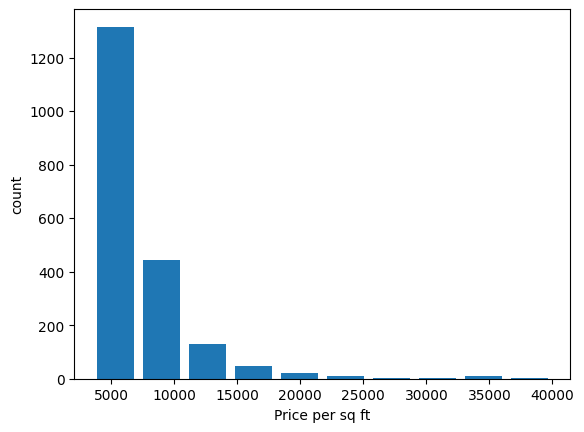

In [37]:
plt.hist(df5['Price_per_sq.ft'],rwidth=0.8)
plt.xlabel('Price per sq ft')
plt.ylabel('count')

In [38]:
df6=df5[df5['Price_per_sq.ft']<=40000]

In [39]:
df6

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type,region
0,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara
1,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara
2,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara
3,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara
4,2700000.0,14300.0,364.0,7420.0,1,2,Agarpara
...,...,...,...,...,...,...,...
1988,11000000.0,54610.0,1800.0,6110.0,2,2,Topsia
1989,37000000.0,184000.0,3000.0,12330.0,5,2,VIP Nagar
1990,37000000.0,184000.0,3000.0,12330.0,5,2,VIP Nagar
1991,17000000.0,84400.0,1440.0,11800.0,3,2,VIP Nagar


In [40]:
dummies = pd.get_dummies(df6.region,dtype='int')
dummies

,Agarpara,Airport,Alipore,Amtala,Ariadaha,Baghajatin,Baghbazar,Baguiati,Baguihati,Baishnabghata Patuli Township,...,South Dum Dum,Tagore Park,Tala,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,VIP Nagar
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df7=pd.concat([df6,dummies],axis=1)
df7.head()

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type,region,Agarpara,Airport,Alipore,...,South Dum Dum,Tagore Park,Tala,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,VIP Nagar
0,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4000000.0,21180.0,1000.0,4000.0,2,2,Agarpara,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8000000.0,39720.0,1500.0,5330.0,4,2,Agarpara,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2700000.0,14300.0,364.0,7420.0,1,2,Agarpara,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df7.drop(['region'],axis=1,inplace=True)

In [43]:
df7

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,Type,Agarpara,Airport,Alipore,Amtala,...,South Dum Dum,Tagore Park,Tala,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,VIP Nagar
0,4000000.0,21180.0,1000.0,4000.0,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4000000.0,21180.0,1000.0,4000.0,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8000000.0,39720.0,1500.0,5330.0,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8000000.0,39720.0,1500.0,5330.0,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2700000.0,14300.0,364.0,7420.0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,11000000.0,54610.0,1800.0,6110.0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1989,37000000.0,184000.0,3000.0,12330.0,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990,37000000.0,184000.0,3000.0,12330.0,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1991,17000000.0,84400.0,1440.0,11800.0,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We need to check if the dataset follows the assumptions of Linear Regression

1. Multicollinearity

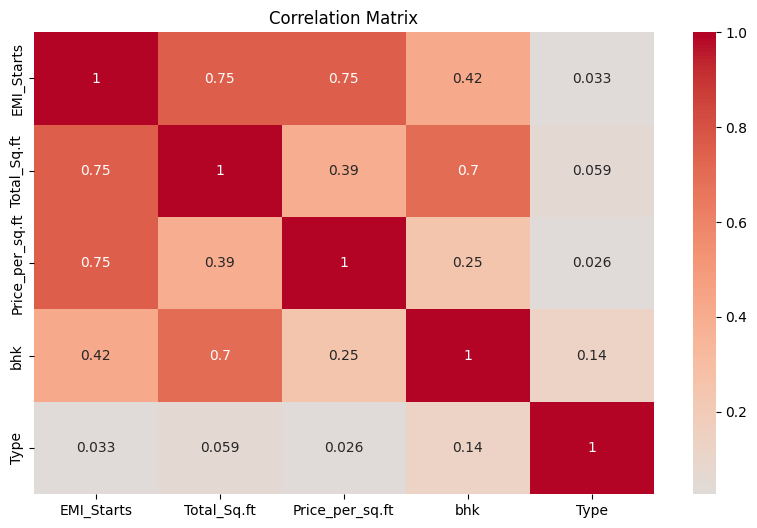

           Feature       VIF
0       EMI_Starts  5.938004
1      Total_Sq.ft  4.574732
2  Price_per_sq.ft  2.909016
3              bhk  2.047265
4             Type  1.024092


In [44]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
x=df7.drop('Flat_Price',axis=1)
y=df7.Flat_Price
x_scaled = scalar.fit_transform(x)
z = pd.DataFrame(x_scaled,columns=x.columns)
z = z[z.columns[:5]]
# ---------- 1. Correlation Matrix ----------
plt.figure(figsize=(10,6))
sns.heatmap(z.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# ---------- 2. Variance Inflation Factor (VIF) ----------
vif_data = pd.DataFrame()
vif_data["Feature"] = z.columns
vif_data["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]

print(vif_data)



Since the VIF of EMI_Starts is more than 5, we remove the feature from the dataset

In [45]:
import statsmodels.api as sm
x=df7.drop(['Flat_Price','EMI_Starts'],axis=1)
y=df7.Flat_Price
x_scaled = scalar.fit_transform(x)
X = sm.add_constant(x_scaled)
ols_model = sm.OLS(y,x_scaled).fit()
residuals = ols_model.resid
fitted_values = ols_model.fittedvalues

2. Homoscedasticity

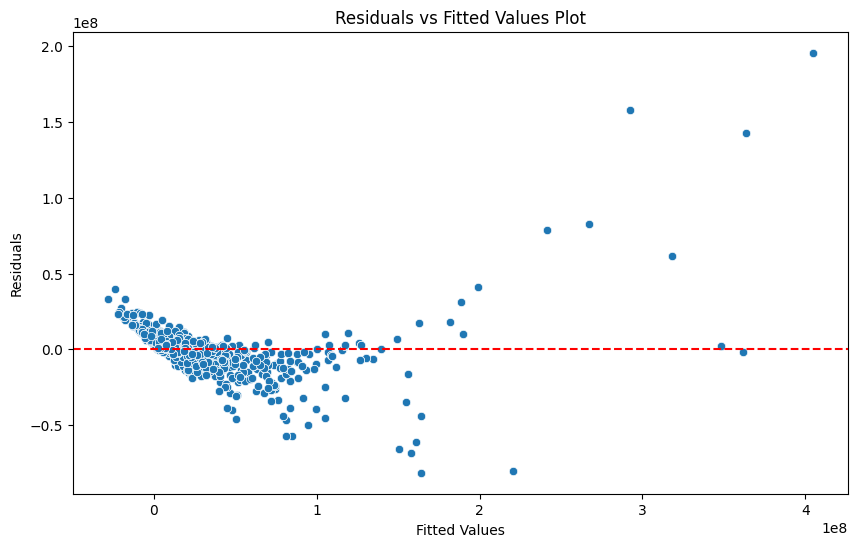

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted_values,y=residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values Plot")
plt.show()

Residuals are tightly clustered near the lower fitted values but spread out more as fitted value increases

This indicates that the variance of residuals increases with fitted values. This is sign of heteroscedasticity

3. Normality of Residuals

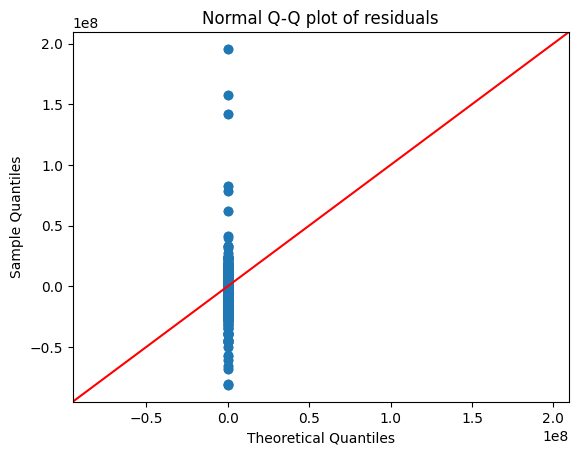

In [47]:
sm.qqplot(residuals,line='45')
plt.title("Normal Q-Q plot of residuals")
plt.show()

By the QQ plot, we can say that the residuals is not normally distributed.

Hence the dataset is not suitable for Linear Regression. We can use Tree based model

# Build a model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
def score(model,x_test,y_test):
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("RMSE:", rmse)
    print("R² Score:", r2)

# Find best model using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators':[50,100,200],
                'criterion': ['squared_error', 'friedman_mse','absolute_error']
            }
        },
        'SVR':{
            'model' : SVR(),
            'params' :{
                'kernel':['rbf','linear','sigmoid'],
                'gamma':['scale','auto']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
             'model': algo_name,
              'best_score': gs.best_score_,
              'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [51]:
models_df = find_best_model_using_gridsearchcv(x,y)

In [55]:
models_df

,model,best_score,best_params
0,decision_tree,0.999853,"{'criterion': 'squared_error', 'splitter': 'ra..."
1,Random Forest,0.999112,"{'criterion': 'absolute_error', 'n_estimators'..."
2,SVR,0.999985,"{'gamma': 'scale', 'kernel': 'linear'}"


In [63]:
model_svr = SVR(gamma='scale',kernel='linear')
model_dc = DecisionTreeRegressor(criterion='squared_error',splitter='random')
model_rf = RandomForestRegressor(criterion='absolute_error',n_estimators=200)

In [65]:
model_svr.fit(x_train,y_train)

SVR(kernel='linear')

In [66]:
model_dc.fit(x_train,y_train)

DecisionTreeRegressor(splitter='random')

In [67]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=200)

In [68]:
score(model_svr,x_test,y_test)

RMSE: 49507168.40132936
R² Score: -0.06660650357989062


In [69]:
score(model_dc,x_test,y_test)

RMSE: 5692726.089125888
R² Score: 0.9858970934357469


In [70]:
score(model_rf,x_test,y_test)

RMSE: 6709318.438490925
R² Score: 0.9804104318219087


In [71]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=500,     # number of trees
    learning_rate=0.05,   # step size shrinkage
    max_depth=6,          # depth of each tree
    subsample=0.8,        # sample ratio
    colsample_bytree=0.8, # feature ratio
    random_state=42
)

# Fit model
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
score(xgb_model,x_test,y_test)

RMSE: 2900524.927428846
R² Score: 0.996338818515773


xgboost gives the best performance here

In [82]:
def predict_price(region,total_sqft,price_per_sqrtft,bhk,Type):
    if Type =='bhk' or Type =='BHK':
        type = 2
    elif Type =='rk' or Type=='RK':
        type = 1
    else:
        type = 0
    loc_index=np.where(x.columns==region)[0][0]

    z=np.zeros(len(x_scaled[0]))
    z[0]=total_sqft
    z[1]=price_per_sqrtft
    z[2]=bhk
    z[3]=type 
    if loc_index >=0:
        z[loc_index]=1
    z_scaled = scalar.transform([z])
    value =xgb_model.predict(z_scaled)[0]
    print(f"Price of {bhk} bhk and {total_sqft} sqft house in {region} is {value}, where price per sqft is {price_per_sqrtft}")

In [85]:
predict_price('Barrackpore',1400,3210,3,'bhk')

Price of 3 bhk and 1400 sqft house in Barrackpore is 4976606.0, where price per sqft is 3210


c:\Users\Swapna Kundu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
